In [11]:
from common_language import _LANGUAGES
import processing as prlib
from scipy.fft import fft
import matplotlib.pyplot as plt
import numpy as np

In [12]:
train_df = prlib.get_dataframe('train')

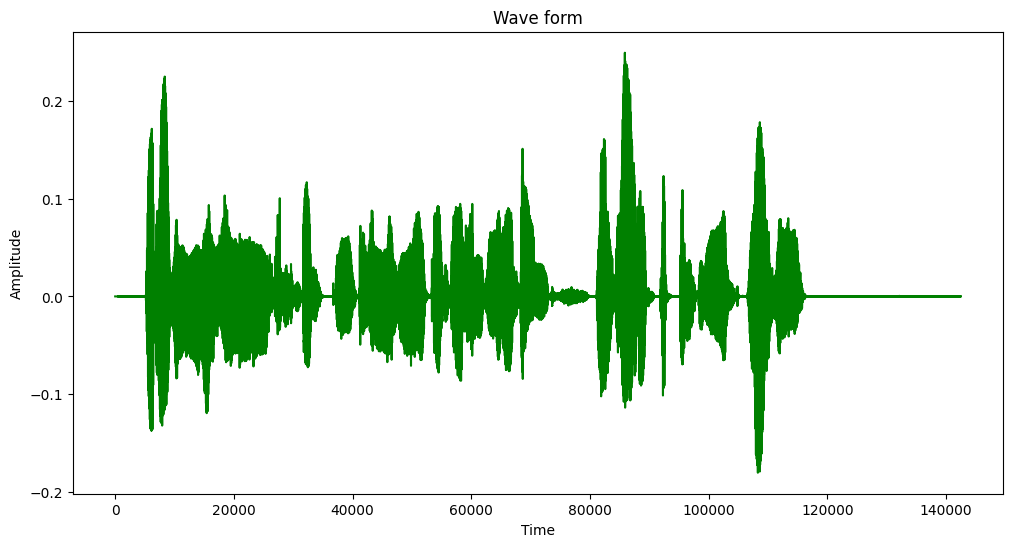

In [13]:
### Get the waveform of the audio file ###
file = train_df['paths'][10000]
path = prlib.get_path('train', 'common_voice_ar_19061960.wav')

#sample_rate represent the number of samples per seconds in the original signal.
data = prlib.get_data(path)

#clean data
plt.figure(figsize=(12,6))
plt.plot(data, color='green')
plt.title('Wave form')
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.show()

Text(0, 0.5, 'Power')

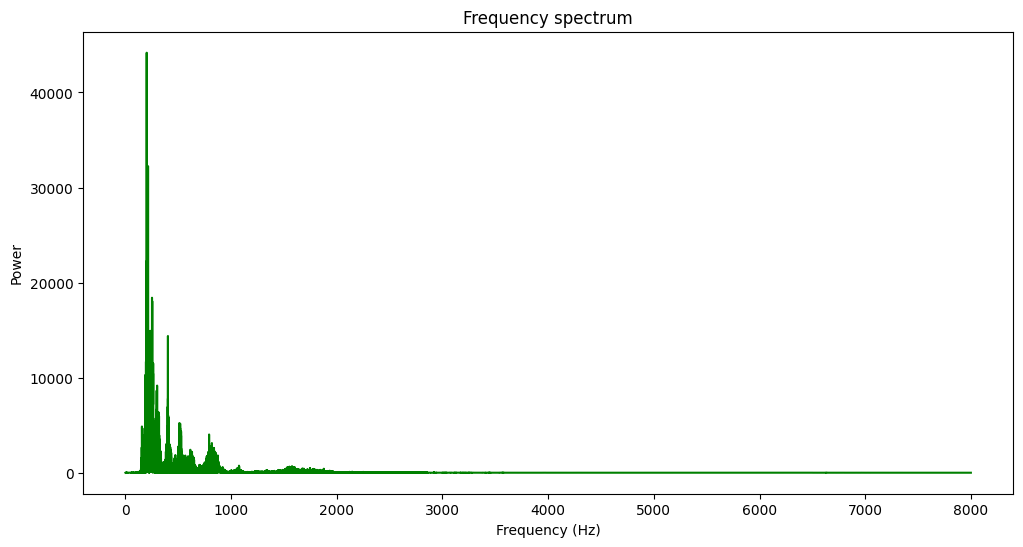

In [14]:
### Get the frequency spectrum ###

fourier_tranform = fft(data)

#Describe how the power = energy/sec varies with the frequency. 
#Better to use it instead of the magnitude spectrum here because it will be easier to find the MFCCs.
#Power = magnitude**2
#Contains the elements on the y axis.
power_spectrum = np.abs(fourier_tranform)**2 

#Find frequencies based on the power.
#Contains the elements on the x axis.
frequencies = np.linspace(0, prlib.sample_rate, len(power_spectrum))

plt.figure(figsize=(12, 6))

#Get the first half of the arrays because of the symetrie.
#Symetrie caused by the complex conjugate.
plt.plot(frequencies[:len(frequencies)//2], power_spectrum[:len(power_spectrum)//2], color='green')
plt.title('Frequency spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')